In [1]:
import numpy as np
from tensorflow import keras
from scipy.io import loadmat
import os
from os import path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import cv2

#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

#if tf.test.gpu_device_name():
  # print('GPU found')
#else:
 #  print("No GPU found")

In [2]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
import os 
current_path = "D:\\final_data_set"
os.chdir(current_path) #if the directory exists or not

In [5]:
current_path

'D:\\final_data_set'

In [8]:
noverlap = 7
nfov = 35

In [126]:
weight_list = ['9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n4_brightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5', '9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5']

In [127]:
overlapfold = [f'n{i}' for i in range(1, noverlap+1)]

In [128]:
img_list = [f'N = {i}.jpg' for i in range(1, noverlap+1)]

In [129]:
fovlist = [f'tFOV{i}' for i in range(1, nfov+1)]

In [130]:
#fovlist

In [131]:
## import images 


#input1 = np.array(cv2.imread('test_overlapped_data//test_overlapped_data//FOV8//lens_4_foc_3.jpg'))
#input1 = cv2.cvtColor(input1, cv2.COLOR_RGB2BGR)
#input = np.array(input1)

#print(input.shape)



In [132]:
#initializer = keras.initializers.HeNormal()

def make_cnn_model(image_size=(201, 201, 3), classes=2, summarize=True):
    input_layer = tf.keras.layers.Input(shape=image_size)
    # block 0: conv-> strided_conv
    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(input_layer)
    x = tf.keras.layers.Conv2D(16, 3, strides=2, padding='same', activation='relu')(x)
    # block 1: conv-> strided_conv
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu')(x)
    # block 2: conv-> strided_conv
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu')(x)
    # block 3: conv-> strided_conv
    x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='relu')(x)
    # block 4: flatten -> FC -> layer_norm -> FC -> out
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)

    #x = keras.layers.BatchNormalization()(x)

    output = tf.keras.layers.Dense(classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    if summarize:
        model.summary()
    return model

In [133]:
## preprocess the input image
# normalization
def Norm_img(overlapped_images):
    img1 = (overlapped_images) / 255 # why 512 = 256*2 = 2^9
    img2 = np.clip(img1, 0.0, 1.0)
    img3 = np.int0(255*img2).astype(np.float32)/255 - 0.5
    return img3

In [134]:
model = make_cnn_model()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 201, 201, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 201, 201, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 101, 101, 16)      2320      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 101, 101, 32)      4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 51, 51, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 51, 51, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)        3692

In [137]:
label = ['negatives', 'positives']

In [138]:
categlabel = [[1, 0], [0, 1]]

In [139]:
filext = ".jpg"

In [140]:
#len([ f for f in os.listdir(os.path.join(current_path, 'dataset_cropped','tFOV'+str(1), label[0], overlapfold[0])) if f.endswith(filext)])

In [141]:
import pandas as pd

In [142]:
#df = pd.DataFrame(np.array([[1, 1, 1.0,1.0, 1.0, 1.0,"test.jpg"]]) , columns = ("Group", "Overlap", "predneg", "predpos", "trueneg", "truepos", "filename"))

In [143]:
#df

In [144]:
import time

In [145]:
current_path

'D:\\final_data_set'

In [148]:
predlist = {}
for seeds in range(3):
    name = weight_list[overlap][:-5] +'_'+'seed'+str(seeds+1)+'.hdf5'
    model.load_weights(os.path.join(current_path, 'new_weights', name))

    for overlap in [3, 5]:#noverlap
        from tensorflow.keras.models import load_model
         # b: 6_18_n1_n32_Lrelu_weights; a: 6_13_n1_new_weights
        for fov in range(1,nfov+1): #nfov+1
            try:
                print(f'FOV = {fov}, overlap = {overlap+1}, seed = {seeds+1}')
                start = time.time()
                df = pd.DataFrame(np.array([[1, 1, 1.0,1.0, 1.0, 1.0, "test.jpg"]]) , columns = ("Group", "Overlap", "predneg", "predpos", "trueneg", "truepos", "filename"))
                for labnum in range(2):
                    for f in os.listdir(os.path.join(current_path, 'dataset_cropped','tFOV'+str(fov), label[labnum], overlapfold[overlap])):

                        if f.endswith(filext):
                            filepath = os.path.join(current_path, 'dataset_cropped', 'tFOV'+str(fov), label[labnum], overlapfold[overlap], f)
                            img = Norm_img(cv2.cvtColor(np.array(cv2.imread(filepath)), cv2.COLOR_BGR2RGB));
                            imgf = tf.convert_to_tensor(img, dtype = tf.float32)
                            pred = model(tf.expand_dims(imgf,axis = 0), training = False)
                            
                            dfappend = np.array(np.concatenate([[np.array(fov)], [np.array(overlap+1)],np.squeeze(pred),np.array(categlabel[labnum]), [np.array(f)]])).reshape((1,7))
                            df = df.append(pd.DataFrame(dfappend,columns = ("Group", "Overlap", "predneg", "predpos", "trueneg", "truepos", "filename")), ignore_index = "True")         
                df.to_pickle(os.path.join(current_path,'decisions', 'decisions_with_seeds',f'n{overlap+1}', f'tFOV{fov}_n{overlap+1}_seed{seeds}.pkl'))                                
                end = time.time()
                print(f'Time Elapsed {end-start}')

            except Exception as e:
                print(e)
                print(f'Error executing FOV = {fov}, overlap = {overlap+1}, seed = {seeds+1}')


                
            
    ## import model
    
        
        
        #model.load_weights('6_18_n1_n32_Lrelu_weights.hdf5')
        


    
    #normed_img = Norm_img(input)

FOV = 1, overlap = 4, seed = 1
Time Elapsed 99.59380197525024
FOV = 2, overlap = 4, seed = 1
Time Elapsed 98.83638000488281
FOV = 3, overlap = 4, seed = 1
Time Elapsed 93.0854480266571
FOV = 4, overlap = 4, seed = 1
Time Elapsed 98.37519645690918
FOV = 5, overlap = 4, seed = 1
Time Elapsed 98.10925197601318
FOV = 6, overlap = 4, seed = 1
Time Elapsed 99.02907657623291
FOV = 7, overlap = 4, seed = 1
Time Elapsed 98.40964913368225
FOV = 8, overlap = 4, seed = 1
Time Elapsed 99.68042635917664
FOV = 9, overlap = 4, seed = 1
Time Elapsed 98.50828766822815
FOV = 10, overlap = 4, seed = 1
Time Elapsed 101.45072436332703
FOV = 11, overlap = 4, seed = 1
Time Elapsed 101.06337928771973
FOV = 12, overlap = 4, seed = 1
Time Elapsed 101.07722163200378
FOV = 13, overlap = 4, seed = 1
Time Elapsed 103.47925591468811
FOV = 14, overlap = 4, seed = 1
Time Elapsed 101.41161870956421
FOV = 15, overlap = 4, seed = 1
Time Elapsed 100.76596164703369
FOV = 16, overlap = 4, seed = 1
Time Elapsed 103.2493891716

In [34]:
#Clearing the dataset
# Chage the swapping of true pos and negative in the original directory
name       

'9_27_test_n2_nobrightaug_uint8_Lrelu_weights.hdf5_1'

In [43]:
for a in [2, 4]:
    print(a)

2
4


In [152]:
## Change decisions to a final average value...
totalseeds = 3
for seeds in range(totalseeds):
    for fov in range(0, nfov):
        for overlap in [0, 2, 3, 4, 5, 6]:#overlapno - 1
            dfcopy = pd.read_pickle(os.path.join(current_path, "decisions",'decisions_with_seeds', f'n{overlap+1}', f'tFOV{fov+1}_n{overlap+1}_seed{seeds}.pkl'))
            #if(dfcopy[0]["filename"]=="test.jpg"):
            #dfcopy = dfcopy[1:-1]
            #dfcopy["Group"] = fov+1
            dfcopy["truepos"] = dfcopy["truepos"].map(lambda x: float(x))
            dfcopy["trueneg"] = dfcopy["trueneg"].map(lambda x: float(x))
            dfcopy["predpos"] = dfcopy["predpos"].map(lambda x: float(x))
            dfcopy["predneg"] = dfcopy["predneg"].map(lambda x: float(x))
            dfcopy.to_pickle(os.path.join(current_path, "decisions",'decisions_with_seeds', f'n{overlap+1}', f'tFOV{fov+1}_n{overlap+1}_seed{seeds}.pkl'))
        

In [153]:
## Averaging results
overlaprange = [0, 2, 3, 4, 5, 6] #overlap no -1;
dfcopytest = {}
for overlap in overlaprange:
    for fov in range(35):
        for seeds in range(totalseeds):
            dfcopytest[seeds] = pd.read_pickle(os.path.join(current_path, "decisions",'decisions_with_seeds', f'n{overlap+1}', f'tFOV{fov+1}_n{overlap+1}_seed{seeds}.pkl'))
        dfcopy = dfcopytest[0]
        for seeds in range(1, totalseeds):
            dfcopy["truepos"] = dfcopy["truepos"]+dfcopytest[seeds]["truepos"]
            dfcopy["trueneg"] = dfcopy["trueneg"]+dfcopytest[seeds]["trueneg"]
            dfcopy["predpos"] = dfcopy["predpos"]+dfcopytest[seeds]["predpos"]
            dfcopy["predneg"] = dfcopy["predneg"]+dfcopytest[seeds]["predneg"]

        dfcopy["truepos"] = dfcopy["truepos"]/totalseeds
        dfcopy["trueneg"] = dfcopy["trueneg"]/totalseeds
        dfcopy["predpos"] = dfcopy["predpos"]/totalseeds
        dfcopy["predneg"] = dfcopy["predneg"]/totalseeds           
                #dfcopy = dfcopytest[0];
        dfcopy.to_pickle(os.path.join(current_path, "decisions",'decisions_with_seeds', f'n{overlap+1}', 'seed_average', f'tFOV{fov+1}_n{overlap+1}.pkl'))

In [154]:
dfcopytest[seeds]

,Group,Overlap,predneg,predpos,trueneg,truepos,filename
2,35,7,0.506177,0.493823,1.0,0.0,1001_111_35_N = 7_.jpg
3,35,7,0.509276,0.490724,1.0,0.0,1001_11_35_N = 7_.jpg
4,35,7,0.505453,0.494547,1.0,0.0,1001_121_35_N = 7_.jpg
5,35,7,0.505250,0.494750,1.0,0.0,1001_131_35_N = 7_.jpg
6,35,7,0.504823,0.495177,1.0,0.0,1001_141_35_N = 7_.jpg
...,...,...,...,...,...,...,...
14330,35,7,0.509399,0.490601,0.0,1.0,951_351_35_N = 7_.jpg
14331,35,7,0.509298,0.490702,0.0,1.0,951_361_35_N = 7_.jpg
14332,35,7,0.509286,0.490714,0.0,1.0,951_371_35_N = 7_.jpg
14333,35,7,0.509581,0.490419,0.0,1.0,951_381_35_N = 7_.jpg


In [72]:
# dfcopy = dfcopytest[0]
# for seeds in (1, totalseeds):
#     dfcopy["truepos"] = dfcopy["truepos"]+dfcopytest[seeds]
#     dfcopy["trueneg"] = dfcopy["trueneg"]+dfcopytest[seeds]
#     dfcopy["predpos"] = dfcopy["predpos"]+dfcopytest[seeds]
#     dfcopy["predneg"] = dfcopy["predneg"]+dfcopytest[seeds]

# dfcopy["truepos"] = dfcopy["truepos"]/totalseeds
# dfcopy["trueneg"] = dfcopy["trueneg"]/totalseeds
# dfcopy["predpos"] = dfcopy["predpos"]/totalseeds
# dfcopy["predneg"] = dfcopy["predneg"]/totalseeds



1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
14331    1.0
14332    1.0
14333    1.0
14334    1.0
14335    1.0
Name: truepos, Length: 14335, dtype: float64

In [ ]:
# # Averaging results
# for overlap in overlaprange:
#     for fov in range(35):
#         for seeds in range(3):
#             dfcopytest[seeds] = pd.read_pickle(os.path.join(current_path, "decisions",'decisions_with_seeds', f'n{overlap+1}', f'tFOV{fov+1}_n{overlap+1}_seed{seeds}.pkl'))

In [66]:
# dfcopytest["predpos"]

1        0.501047
2        0.503103
3        0.496093
4        0.504835
5        0.501640
           ...   
14331    0.742283
14332    0.731910
14333    0.692923
14334    0.647869
14335    0.598998
Name: predpos, Length: 14335, dtype: float64

In [155]:
#Change the string to float variables for the truepos, trueneg, falsepos, falseneg and removing the first row from every dataframe(Currently doing for n= 2)
for fov in range(0, 35):
    for overlap in range(0, noverlap):
        dfcopy = pd.read_pickle(os.path.join(current_path, "decisions",f'tFOV{fov+1}_n{overlap+1}.pkl'))
        #dfcopy = dfcopy[1:-1]
        #dfcopy["Group"] = fov+1
        dfcopy["truepos"] = dfcopy["truepos"].map(lambda x: float(x))
        dfcopy["trueneg"] = dfcopy["trueneg"].map(lambda x: float(x))
        dfcopy["predpos"] = dfcopy["predpos"].map(lambda x: float(x))
        dfcopy["predneg"] = dfcopy["predneg"].map(lambda x: float(x))
        dfcopy.to_pickle(os.path.join(current_path, "decisions",f'tFOV{fov+1}_n{overlap+1}.pkl'))
        #dfcopy = dfcopy.rename(columns={'truepos': 'trueneg', 'trueneg': "truepos"})
        #dfcopy = dfcopy.iloc[:, [0,1,2,3, 5, 4, 6]]
        #dfcopy.iloc[:, [0,1,2,3, 5, 4, 6]]
#         
    
#       #dfcopy.rename(columns={'truepos': 'tn', 'trueneg': "tp"})
      

In [156]:
# ## Save aggregate fovwise ROC variables

for fov in range(0, nfov):   
    dffinal = pd.concat([pd.read_pickle(os.path.join(current_path, "decisions",f'tFOV{fov+1}_n{overlap+1}.pkl')) for overlap in range(0, noverlap)])
    dffinal.to_pickle(os.path.join(current_path, "decisions",'aggregate_fovwise',f'tFOV{fov+1}_overlaps.pkl'))
        
#         #dfcopy = dfcopy[1:-1]
#         #dfcopy["Group"] = fov+
#         #dfcopy.to_pickle(os.path.join(current_path, "decisions",f'tFOV{fov+1}_n{overlap+1}.pkl'))



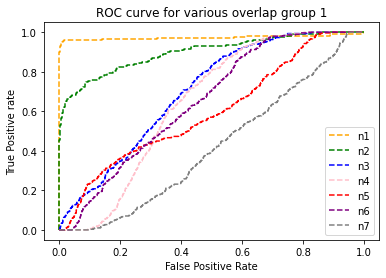

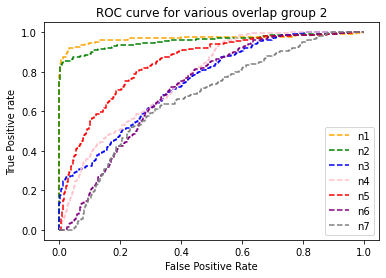

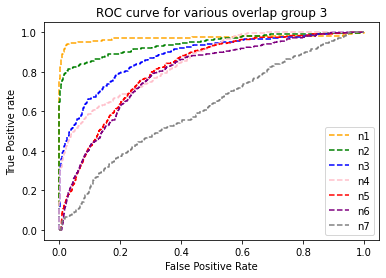

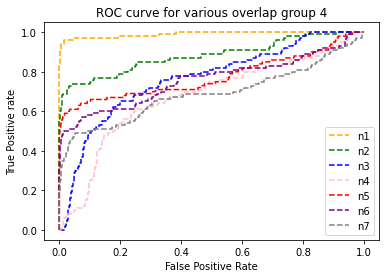

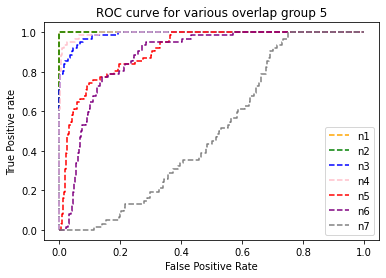

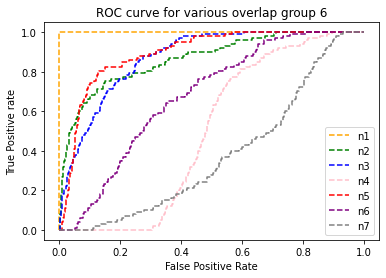

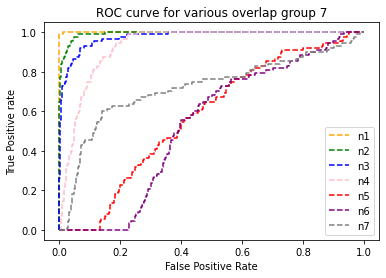

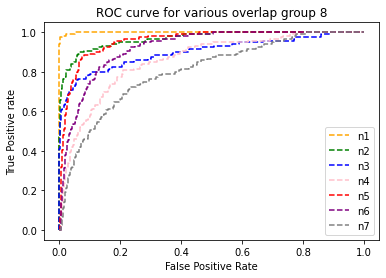

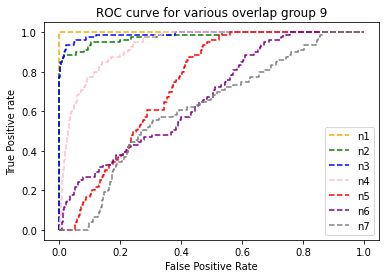

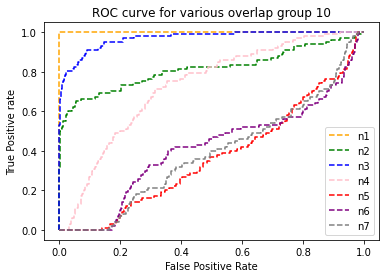

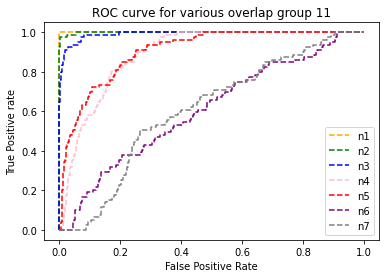

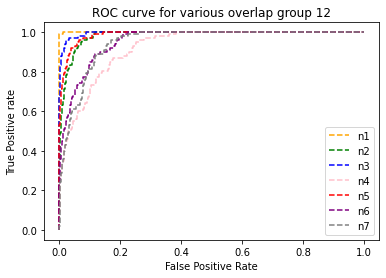

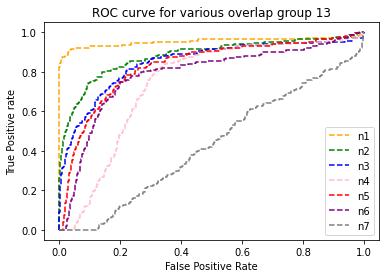

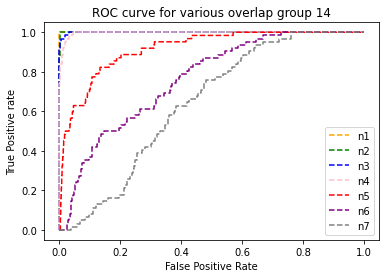

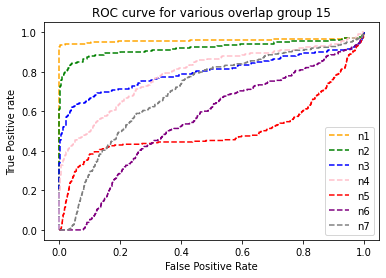

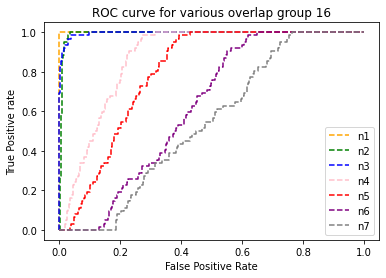

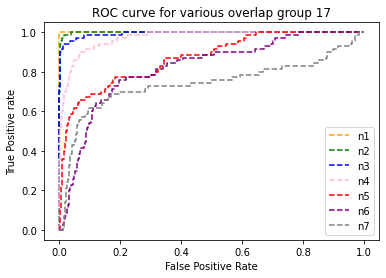

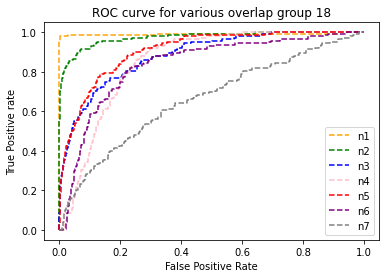

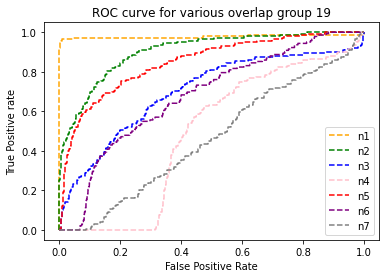

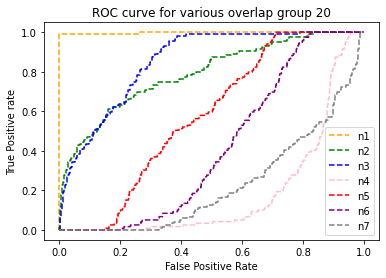

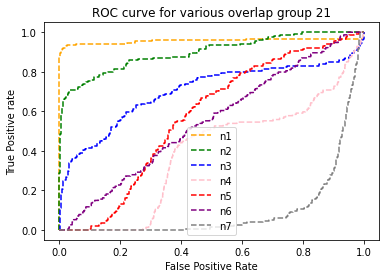

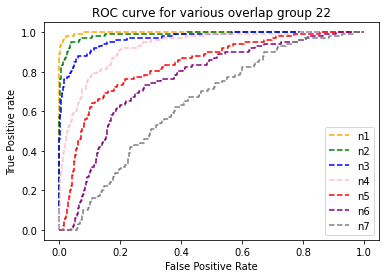

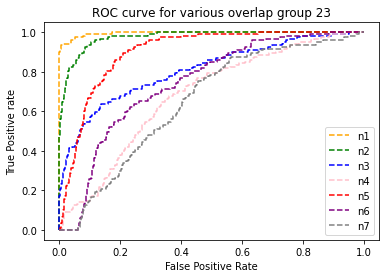

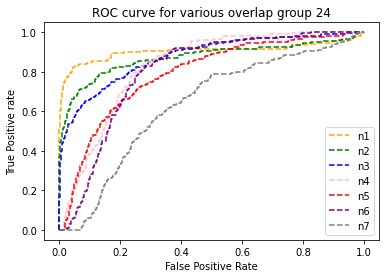

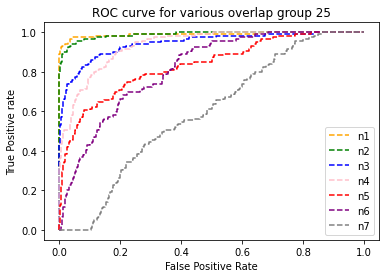

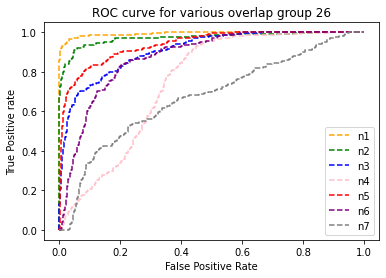

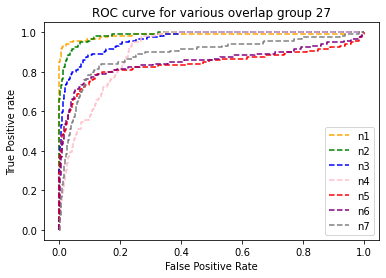

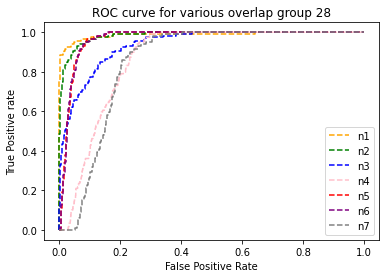

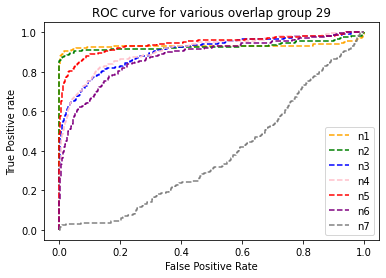

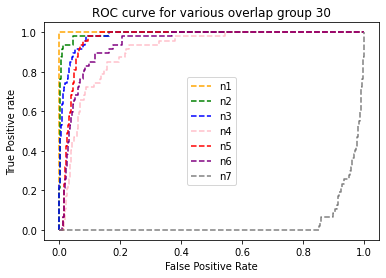

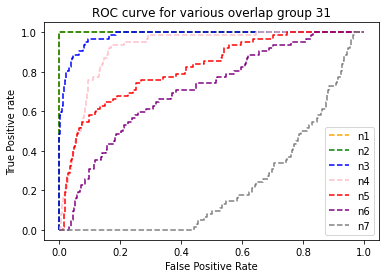

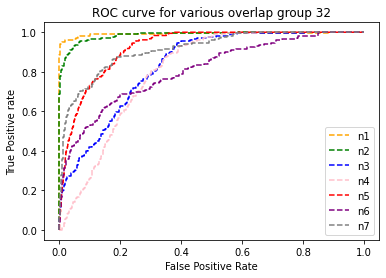

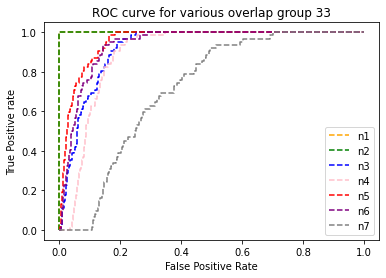

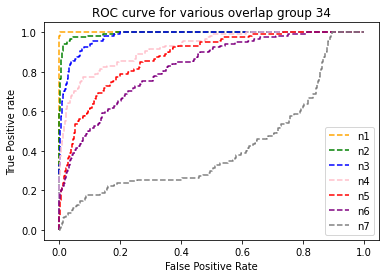

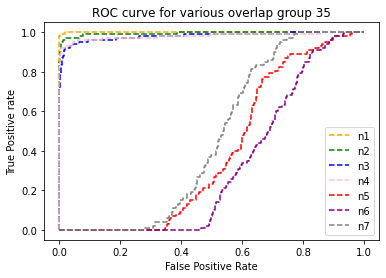

In [157]:
#Plot AUC-ROC curve

from sklearn.metrics import roc_curve

for fov in range(0, 35):
    fpr = {}
    tpr = {}
    thresh ={}
    df_final = pd.read_pickle(os.path.join(current_path, "decisions",'aggregate_fovwise',f'tFOV{fov+1}_overlaps.pkl'))
    # Extracting roc
    for overlap in range(0, noverlap):
        y_test = df_final[df_final["Overlap"]==str(1+overlap)]["truepos"].to_numpy()
        pred_prob = df_final[df_final["Overlap"]==str(1+overlap)]["predpos"].to_numpy()
        fpr[overlap], tpr[overlap], thresh[overlap] = roc_curve(y_test, pred_prob, pos_label=1)
        
        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='n1')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='n2')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='n3')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='n4')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='n5')
    plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='n6')
    plt.plot(fpr[6], tpr[6], linestyle='--',color='grey', label='n7')
    
    plt.title(f'ROC curve for various overlap group {fov+1}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    
    plt.legend(loc='best')
    fig1 = plt.gcf()
    plt.show()
    fig1.savefig(os.path.join(current_path, 'decisions', 'figures', f'ROC curve for various overlap group_{fov+1}.png'));
    
    
    
    


In [116]:
y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [158]:
#Plot AUC-ROC curve aggregate

from sklearn.metrics import roc_curve

fpr = {}
tpr = {}
thresh ={}

y_test = {}
pred_prob = {}

for overlap in range(0, noverlap):
    y_test[overlap] = []
    pred_prob[overlap] = []
    

for overlap in range(noverlap):
    for fov in range(0, nfov):
        df_final = pd.read_pickle(os.path.join(current_path, "decisions",'aggregate_fovwise',f'tFOV{fov+1}_overlaps.pkl'))

        ytest = df_final[df_final["Overlap"]==str(1+overlap)]["truepos"].to_numpy()
        predprob = df_final[df_final["Overlap"]==str(1+overlap)]["predpos"].to_numpy()
        y_test[overlap].append(np.array(ytest))
        pred_prob[overlap].append(np.array(predprob))
    
    
    


In [159]:
## concatenating for each overlap

for overlap in range(noverlap):
    y_test[overlap] = np.concatenate(y_test[overlap])
    pred_prob[overlap] = np.concatenate(pred_prob[overlap])

In [160]:
# Plot aggregate ROC

from sklearn.metrics import roc_curve, auc
fpr_ag = {}
tpr_ag = {}
thresh_ag ={}



auclist = {}
g_means_max_index = {}
# Extracting roc aggregate
for overlap in range(0, noverlap):
    fpr_ag[overlap], tpr_ag[overlap], thresh_ag[overlap] = roc_curve(y_test[overlap], pred_prob[overlap], pos_label=1)
    
    

# Extracting best thresholds by Calculating gmeans max index
for overlap in range(noverlap):
    g_means_max_index[overlap] =  np.argmax(np.sqrt(tpr_ag[overlap]*(1-fpr_ag[overlap])))

# calculating auc for different overlaps

for overlap in range(noverlap):
    auclist[overlap] =  auc(fpr_ag[overlap], tpr_ag[overlap])

    
# Plotting for different overlaps level




In [203]:
from scipy.io import savemat

mdict = {'fpr_ag':fpr_ag, 'tpr_ag':tpr_ag, 'thresh_ag':thresh_ag}
savemat('confmat.mat', mdict)

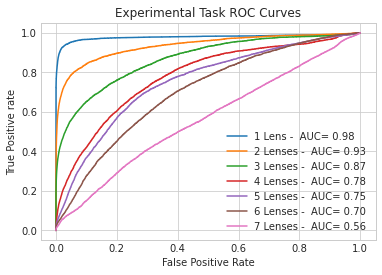

In [161]:
collist = ['blue', 'orange', 'green','red', 'brown', 'purple', 'grey']
lablist = ['1 Lens - ', '2 Lenses - ', '3 Lenses - ', '4 Lenses - ', '5 Lenses - ', '6 Lenses - ', '7 Lenses - ']
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(1, 1)
    for overlap in range(0, noverlap):                                                                                               
        plt.plot(fpr_ag[overlap], tpr_ag[overlap], linestyle='-', label=lablist[overlap]+f' AUC= {"{:.2f}".format(auclist[overlap])}')

    #plt.plot([0, 1.0], [0, 1.0], label = '0.5')
    plt.title('Experimental Task ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    fig1 = plt.gcf()
plt.show()
fig1.savefig(os.path.join(current_path, 'decisions','figures','ROC_curve_aggregate_new.png'));


In [162]:
#Store confusion matrix for various overlaps by calulating thresholded confusion matrices based on g-means metric
conf_mat_agg = {}
thresh = [thresh_ag[overlap][g_means_max_index[overlap]] for overlap in range(0, noverlap)]

In [163]:
thresh

[0.5201384666666666,
 0.5211967833333334,
 0.5436662666666666,
 0.5166088733333334,
 0.49936393333333334,
 0.50018841,
 0.48473368]

In [164]:

from sklearn.metrics import confusion_matrix
for overlap in range(0, noverlap):
    pred_disc = (pred_prob[overlap]>thresh[overlap]).astype(int)
    conf_mat_agg[overlap] = confusion_matrix(y_true=y_test[overlap], y_pred = pred_disc)


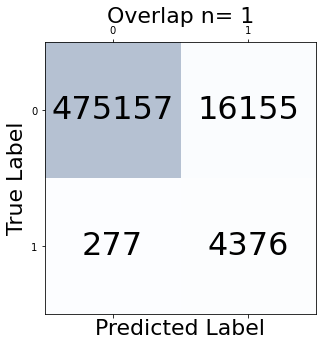

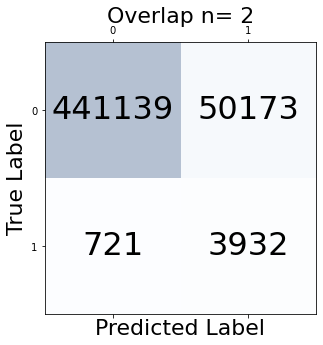

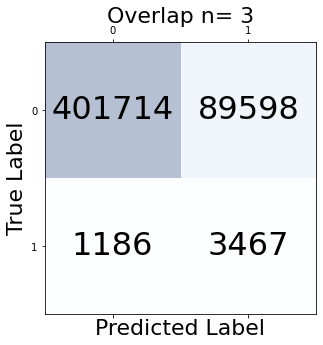

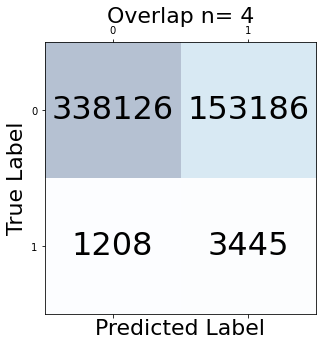

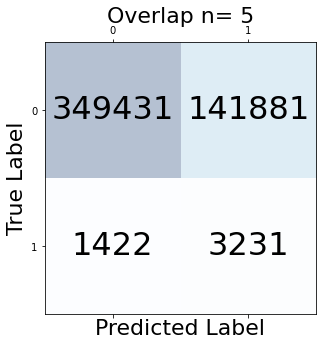

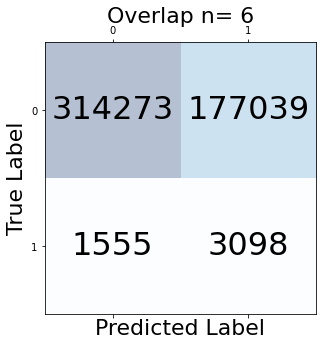

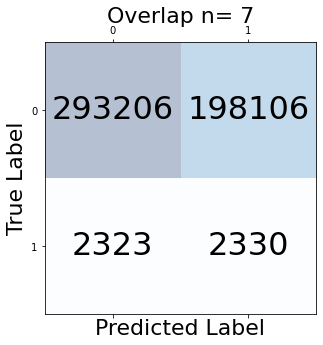

In [201]:
for overlap in range(0, noverlap):
    conf_matrix = conf_mat_agg[overlap]
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=32)
 
    plt.xlabel(f'Predicted Label', fontsize=22)
    plt.ylabel('True Label', fontsize=22)
    plt.title(f'Overlap n= {overlap+1}', fontsize=22)
    
    fig2 = plt.gcf()
    plt.show()
    fig2.savefig(os.path.join(current_path,'decisions','figures', f'Overlap n= {overlap+1}.png'), dpi = 300);
    

In [191]:
# For heat maps load the variables
from scipy.io import loadmat
prediction_hm = loadmat("D:\\final_data_set\\new_simu_heatmap\\predictions.mat")

In [192]:
prediction_hm['ypred']

array([[0.00175376],
       [0.00076715],
       [0.00041035],
       ...,
       [0.01201605],
       [0.00447594],
       [0.00363019]], dtype=float32)

In [193]:
# Plot aggregate ROC

from sklearn.metrics import roc_curve, auc
fpr_hm = {}
tpr_hm = {}
thresh_hm ={}
#auclist = {}
g_means_max_index = {}
# Extracting roc aggregate
for overlap in range(0, 1):
    fpr_hm[overlap], tpr_hm[overlap], thresh_hm[overlap] = roc_curve(prediction_hm['ytruth'], prediction_hm['ypred'], pos_label=1)
    
    

# Extracting best thresholds by Calculating gmeans max index
for overlap in range(1):
    g_means_max_index[overlap] =  np.argmax(np.sqrt(tpr_hm[overlap]*(1-fpr_hm[overlap])))



In [194]:
 prediction_hm['ytruth']

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [195]:
g_means_max_index[overlap]

372

In [197]:
#print threshold
thresh_hm[0][g_means_max_index[0]]

0.017146291

In [ ]:
## Obtain heatmp threshold
thresh_hm[0]

In [179]:
acc = {}
for overlap in range(7):
    acc[f'overlap = {overlap+1}'] = (conf_mat_agg[overlap][1][1]+conf_mat_agg[overlap][0][0])/(conf_mat_agg[overlap][1][1]+conf_mat_agg[overlap][1][0]+conf_mat_agg[overlap][0][1]+conf_mat_agg[overlap][0][0])

In [180]:
acc

{'overlap = 1': 0.9668686298428316,
 'overlap = 2': 0.897383887975966,
 'overlap = 3': 0.8169548254413114,
 'overlap = 4': 0.6886998074460899,
 'overlap = 5': 0.7110622725393929,
 'overlap = 6': 0.6399060417569788,
 'overlap = 7': 0.5958807577147581}

In [ ]:
tprrate = {}
for overlap in range(7):
    acc[f'overlap = {overlap+1}'] = (conf_mat_agg[overlap][1][1]+conf_mat_agg[overlap][0][0])/(conf_mat_agg[overlap][1][1]+conf_mat_agg[overlap][1][0]+conf_mat_agg[overlap][0][1]+conf_mat_agg[overlap][0][0])

In [175]:
conf_mat_agg[overlap][1][1]+conf_mat_agg[overlap][1][0]+conf_mat_agg[overlap][0][1]+conf_mat_agg[overlap][0][0]

495965

In [482]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='n1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='n2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='n3')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='n4')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='n5')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='n6')
plt.plot(fpr[6], tpr[6], linestyle='--',color='grey', label='n7')


plt.title(f'ROC curve for various overlap group {fov+1}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
fig1 = plt.gcf()
plt.show()
fig1.savefig(os.path.join(current_path, f'ROC curve for various overlap group_{fov+1}.png'));
    

KeyError: 0

In [201]:
y_test = (df_final[df_final["Overlap"]==str(1+overlap)]["predpos"]).to_numpy()

array([0.6349578 , 0.66026014, 0.7519942 , ..., 0.94695526, 0.9359686 ,
       0.9134916 ])

In [190]:
df_final[df_final["Overlap"]==str(1+overlap)]

,Group,Overlap,predneg,predpos,trueneg,truepos,filename
1,1,7,0.127574,0.872426,1.0,0.0,1001_101_1_N = 7_.jpg
2,1,7,0.519037,0.480963,1.0,0.0,1001_111_1_N = 7_.jpg
3,1,7,0.630833,0.369167,1.0,0.0,1001_11_1_N = 7_.jpg
4,1,7,0.526347,0.473653,1.0,0.0,1001_121_1_N = 7_.jpg
5,1,7,0.825299,0.174701,1.0,0.0,1001_131_1_N = 7_.jpg
...,...,...,...,...,...,...,...
13891,1,7,0.910835,0.089165,0.0,1.0,961_361_1_N = 7_.jpg
13892,1,7,0.959499,0.040501,0.0,1.0,961_371_1_N = 7_.jpg
13893,1,7,0.980266,0.019734,0.0,1.0,961_381_1_N = 7_.jpg
13894,1,7,0.988633,0.011367,0.0,1.0,961_391_1_N = 7_.jpg
